
## **문제상황 Introduction**
---
> **시나리오** 💳🏸

```
A사는 신규 브랜드의 점포를 입점 시키려는 계획을 가지고 있다. 신규 브랜드이기 때문에 과거 상권에 대한 정보가 없어,   
어느 지역에 입점을 시켜야할지 고민이 많다. 고민 끝에 후보 지역A를 최종 후보로 정했다.   
하지만 자신들의 브랜드와 해당 지역에 거주하는 고객의 소비성향과 비슷한지가 아직 의문이다.  
따라서 신용카드 Spending data를 활용하여 고객의 소비 성향을 파악하고자 한다.  
파악된 고객의 소비성향과 브랜드의 성향이 맞는지 비교해보고 최종 결정을 내리고자 한다.

```  

> **문제정의**

```
▶ 신규 브랜드 입점 상권 불분명
```  

> **기대효과**

```
▶ 신규 상권 입점 여부 결정 및 상권의 고객 소비성향 파악
```

> **해결방안**

```
▶ 카드 Spending data 활용 지역 거주 고객 소비성향 파악 및 브랜드와 매칭을 통해 입점 결정
```

> **성과측정**  

```
▶ 신규 진입 결정 여부
```

> **현업적용**  

```
▶ 인사이트 Report 작성 및 보고
```

> **데이터 살펴보기**

* 상점 ID별 카드 Spending data
* 데이터 명세

|store_id|date|time|card_id|amount|installments|
|:---:|:---:|:---:|:---:|:---:|:---:|
|상점 ID|날짜|시간|카드 ID|매출액(음수는 거래취소)|할부개월, 일시불은 빈문자열|
|dats_of_week|holyday|
|요일(월요일0, 일요일6)|공휴일 여부|


In [ ]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

# 경로 설정
import os
os.chdir('/content/drive/MyDrive/Wanted')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Wanted'

In [ ]:
# Data
import pandas as pd
df = pd.read_csv('S_PJT04_DATA.csv')
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


# Data EDA

In [ ]:
# Data 형태
print(df.shape)

(3362796, 8)


In [ ]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [ ]:
# 결측값 확인
df.isnull().sum()

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

In [ ]:
# 일시불 0으로 처리
df['installments'].fillna(0, inplace = True)

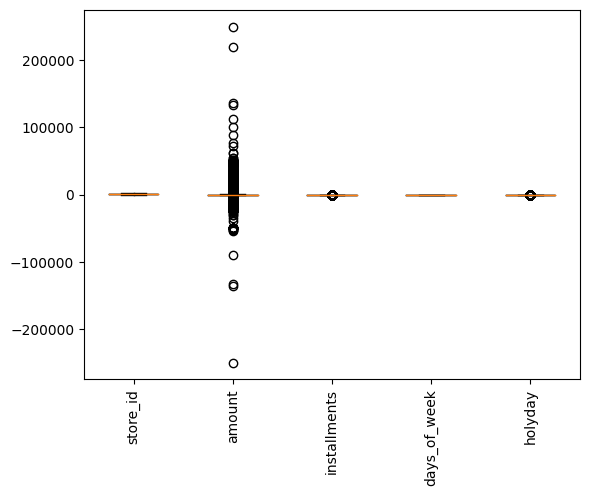

In [ ]:
# 이상치 확인
import matplotlib.pyplot as plt

# int와 float 타입의 열들을 선택
numeric_data = df.select_dtypes(include=['int', 'float'])

# 박스플롯 그리기
plt.boxplot([numeric_data[col] for col in numeric_data.columns])
plt.xticks(range(1, len(numeric_data.columns) + 1), numeric_data.columns, rotation='vertical')
plt.show()

In [ ]:
df.describe()

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,3.362796e+06,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,1.734479e-02,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.969142e-01,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,0.000000e+00,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,0.000000e+00,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,0.000000e+00,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,3.600000e+01,6.000000e+00,1.000000e+00


In [ ]:
# ▶ Null 값 확인
print(df.isnull().sum())

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
dtype: int64


# 업종별 분석

In [ ]:
# store_id 별 결제 금액
df_store_amt = df.groupby('store_id')['amount'].sum().sort_values(ascending=False).reset_index()
df_store_amt.columns = ['store_id', 'amt']
df_store_amt['total_amt'] = df_store_amt['amt'].sum()
df_store_amt['ratio_amt'] = df_store_amt['amt'] / df_store_amt['total_amt']
df_store_amt.head()

,store_id,amt,total_amt,ratio_amt
0,753,9474601,490841453,0.019303
1,1342,7301327,490841453,0.014875
2,161,5236075,490841453,0.010668
3,0,5234611,490841453,0.010665
4,958,4965728,490841453,0.010117


In [ ]:
# store_id 별 결제 수
df_store_cnt = df['store_id'].value_counts().reset_index()
df_store_cnt.columns = ['store_id', 'cnt']
df_store_cnt['total_cnt'] = df_store_cnt['cnt'].sum()
df_store_cnt['ratio_cnt'] = df_store_cnt['cnt'] / df_store_cnt['total_cnt']
df_store_cnt.head()

,store_id,cnt,total_cnt,ratio_cnt
0,0,68773,3362796,0.020451
1,753,39318,3362796,0.011692
2,105,36063,3362796,0.010724
3,1342,33335,3362796,0.009913
4,428,33285,3362796,0.009898


In [ ]:
# store_id 개수
df['store_id'].nunique()

1775

In [ ]:
df_store = pd.merge(df_store_amt, df_store_cnt, on='store_id')
df_store.head()

,store_id,amt,total_amt,ratio_amt,cnt,total_cnt,ratio_cnt
0,753,9474601,490841453,0.019303,39318,3362796,0.011692
1,1342,7301327,490841453,0.014875,33335,3362796,0.009913
2,161,5236075,490841453,0.010668,27170,3362796,0.008080
3,0,5234611,490841453,0.010665,68773,3362796,0.020451
4,958,4965728,490841453,0.010117,7810,3362796,0.002322


In [ ]:
# store_id 별 이용 고객
user = df.groupby(['store_id'])['card_id'].nunique().reset_index()
user.columns = ['store_id', 'user_cnt']
user['total_user'] = user['user_cnt'].sum()
user['ratio_user'] = user['user_cnt'] / user['total_user']
user.head()

,store_id,user_cnt,total_user,ratio_user
0,0,12727,1797869,0.007079
1,1,8,1797869,0.000004
2,2,9053,1797869,0.005035
3,3,231,1797869,0.000128
4,4,1176,1797869,0.000654


In [ ]:
df_store_final = pd.merge(df_store, user, on='store_id')
df_store_final.head()

,store_id,amt,total_amt,ratio_amt,cnt,total_cnt,ratio_cnt,user_cnt,total_user,ratio_user
0,753,9474601,490841453,0.019303,39318,3362796,0.011692,11960,1797869,0.006652
1,1342,7301327,490841453,0.014875,33335,3362796,0.009913,14789,1797869,0.008226
2,161,5236075,490841453,0.010668,27170,3362796,0.008080,7224,1797869,0.004018
3,0,5234611,490841453,0.010665,68773,3362796,0.020451,12727,1797869,0.007079
4,958,4965728,490841453,0.010117,7810,3362796,0.002322,2894,1797869,0.001610


In [ ]:
# 1회 사용금액
df_store_final['unit_price'] = round(df_store_final['amt'] / df_store_final['cnt'],2)
# 객단가
df_store_final['cnt_per_use'] = round(df_store_final['cnt'] / df_store_final['user_cnt'],2)

In [ ]:
# 종합 점수
df_store_final['score'] = df_store_final['ratio_amt'] * 0.3 + df_store_final['ratio_cnt'] * 0.3 + df_store_final['ratio_user'] * 0.4

In [ ]:
df_store_final.head()

,store_id,amt,total_amt,ratio_amt,cnt,total_cnt,ratio_cnt,user_cnt,total_user,ratio_user,unit_price,cnt_per_use,score
0,753,9474601,490841453,0.019303,39318,3362796,0.011692,11960,1797869,0.006652,240.97,3.29,0.011959
1,1342,7301327,490841453,0.014875,33335,3362796,0.009913,14789,1797869,0.008226,219.03,2.25,0.010727
2,161,5236075,490841453,0.010668,27170,3362796,0.008080,7224,1797869,0.004018,192.72,3.76,0.007231
3,0,5234611,490841453,0.010665,68773,3362796,0.020451,12727,1797869,0.007079,76.11,5.40,0.012166
4,958,4965728,490841453,0.010117,7810,3362796,0.002322,2894,1797869,0.001610,635.82,2.70,0.004376


In [ ]:
# 종합 점수 변환
df_store_final['scaled_score'] = df_store_final['score'].apply(lambda x: (x - df_store_final['score'].min())  / (df_store_final['score'].max() - df_store_final['score'].min()) )
df_store_final['scaled_score'] = round(df_store_final['scaled_score'] * 100,0)
df_store_final.head(5)

,store_id,amt,total_amt,ratio_amt,cnt,total_cnt,ratio_cnt,user_cnt,total_user,ratio_user,unit_price,cnt_per_use,score,scaled_score
0,753,9474601,490841453,0.019303,39318,3362796,0.011692,11960,1797869,0.006652,240.97,3.29,0.011959,98.0
1,1342,7301327,490841453,0.014875,33335,3362796,0.009913,14789,1797869,0.008226,219.03,2.25,0.010727,88.0
2,161,5236075,490841453,0.010668,27170,3362796,0.008080,7224,1797869,0.004018,192.72,3.76,0.007231,59.0
3,0,5234611,490841453,0.010665,68773,3362796,0.020451,12727,1797869,0.007079,76.11,5.40,0.012166,100.0
4,958,4965728,490841453,0.010117,7810,3362796,0.002322,2894,1797869,0.001610,635.82,2.70,0.004376,36.0


In [ ]:
# 점수 내림차순
df_store_final.sort_values(by=['scaled_score'], ascending=False).head(5)

,store_id,amt,total_amt,ratio_amt,cnt,total_cnt,ratio_cnt,user_cnt,total_user,ratio_user,unit_price,cnt_per_use,score,scaled_score
3,0,5234611,490841453,0.010665,68773,3362796,0.020451,12727,1797869,0.007079,76.11,5.40,0.012166,100.0
0,753,9474601,490841453,0.019303,39318,3362796,0.011692,11960,1797869,0.006652,240.97,3.29,0.011959,98.0
1,1342,7301327,490841453,0.014875,33335,3362796,0.009913,14789,1797869,0.008226,219.03,2.25,0.010727,88.0
17,221,2513245,490841453,0.005120,31409,3362796,0.009340,17161,1797869,0.009545,80.02,1.83,0.008156,67.0
53,428,1312204,490841453,0.002673,33285,3362796,0.009898,18456,1797869,0.010265,39.42,1.80,0.007878,65.0


# 요일별

In [ ]:
# 상위 5개 store_id 만
top5 = df[df['store_id'].isin([0, 753,1342,221,428])]
top5.sample(10)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
49090,0,2018-02-13,15:50:10,c12caf9933,15,0.0,1,0
557906,221,2016-09-07,16:54:57,cf371b107d,80,0.0,2,0
11858,0,2017-04-03,17:25:19,0330b026fd,247,0.0,0,0
1593401,753,2017-05-18,18:49:12,d2d7e2172d,239,0.0,3,0
1606829,753,2017-10-27,15:36:14,1116e2aea9,420,0.0,4,0
2540732,1342,2017-12-25,06:45:20,9744eaa5f8,465,0.0,0,1
2538383,1342,2017-11-27,05:28:23,04c94b336b,200,0.0,0,0
584540,221,2018-05-27,16:45:51,3f201cbb30,98,0.0,6,0
1056194,428,2017-01-25,20:22:43,1b4172b8c7,64,0.0,2,0
43211,0,2017-12-23,20:04:08,56f8420760,19,0.0,5,0


In [ ]:
# 요일별 수
top_5_cnt = top5['days_of_week'].value_counts().reset_index()
top_5_cnt = top_5_cnt.sort_values(by='index', ascending=True)
top_5_cnt

,index,days_of_week
6,0,28153
5,1,28159
3,2,28635
4,3,28269
2,4,29282
0,5,32850
1,6,30772


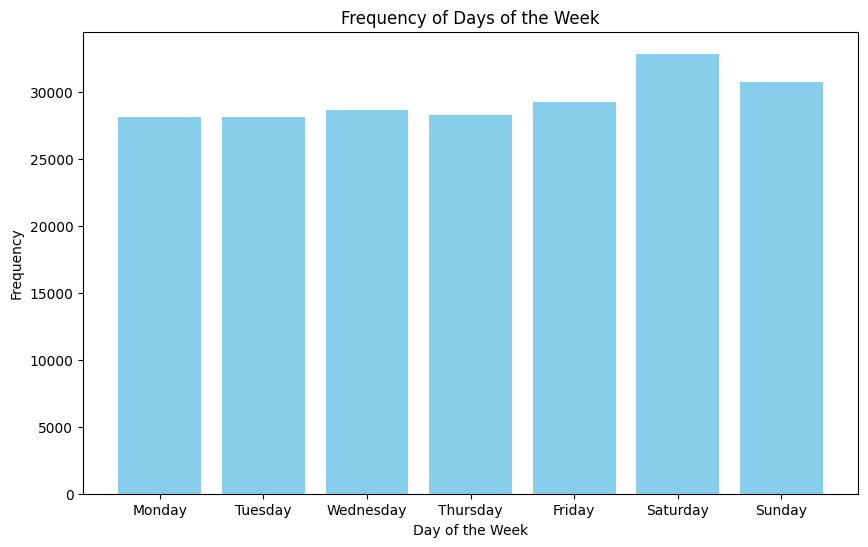

In [ ]:
# 박스플롯 그리기
# 숫자를 요일 이름으로 매핑
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
top_5_cnt['day_name'] = top_5_cnt['index'].apply(lambda x: day_names[x])

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(top_5_cnt['day_name'], top_5_cnt['days_of_week'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Frequency of Days of the Week')
plt.show()

In [ ]:
# 주말 & 주중
import numpy as np

top5['weekend'] = np.where(top5['days_of_week'].isin([5,6]), 1, 0) # 주말이면 1 주중이면 0
top5['weekend'].value_counts().reset_index()

,index,weekend
0,0,142498
1,1,63622


In [ ]:
# 공휴일 여부
top5['holyday'].value_counts().reset_index()

,index,holyday
0,0,195671
1,1,10449


In [ ]:
# 할부 개월 수
top5.installments.value_counts()

0.0     205454
3.0        477
2.0        172
5.0         12
24.0         3
4.0          2
Name: installments, dtype: int64

# 업종별 취소 금액

In [58]:
# 취소 금액
print(round(top5[top5['amount'] < 0].shape[0] / top5.shape[0] * 100, 3), '%')

0.775 %


In [63]:
# store_id 별 취소금액
top5_cancel = top5[top5['amount'] < 0]
top5_cancel.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
111,0,2016-12-20,21:06:16,5cb027b003,-108,0.0,1,0,0
155,0,2016-12-21,11:16:17,65d5e33f69,-445,3.0,2,0,0
165,0,2016-12-21,11:58:13,3c4e290f01,-87,0.0,2,0,0
169,0,2016-12-21,12:04:30,3c4e290f01,-50,0.0,2,0,0


In [71]:
cancel_cnt = top5_cancel.groupby(by='store_id')['amount'].count().reset_index()
cancel_cnt.columns = ['store_id', 'cancel_cnt']
cancel_cnt['total_cancel_cnt'] = df[df['amount'] < 0].shape[0]
cancel_cnt['ratio_cancel_cnt'] = round(cancel_cnt['cancel_cnt'] / cancel_cnt['total_cancel_cnt']*100,4)
cancel_cnt.head()

,store_id,cancel_cnt,total_cancel_cnt,ratio_cancel_cnt
0,0,613,33832,1.8119
1,221,417,33832,1.2326
2,428,279,33832,0.8247
3,753,111,33832,0.3281
4,1342,177,33832,0.5232


# 핵심 업종별 날짜별 매출 비중

In [73]:
# 날짜 데이터 처리
top5['date'] = pd.to_datetime(top5['date'])
top5['year'] = top5['date'].dt.year
top5['month'] = top5['date'].dt.month
top5['day'] = top5['date'].dt.day
top5.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend,year,month,day
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0,2016,12,14
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0,2016,12,14
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0,2016,12,19
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0,2016,12,19
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0,2016,12,19


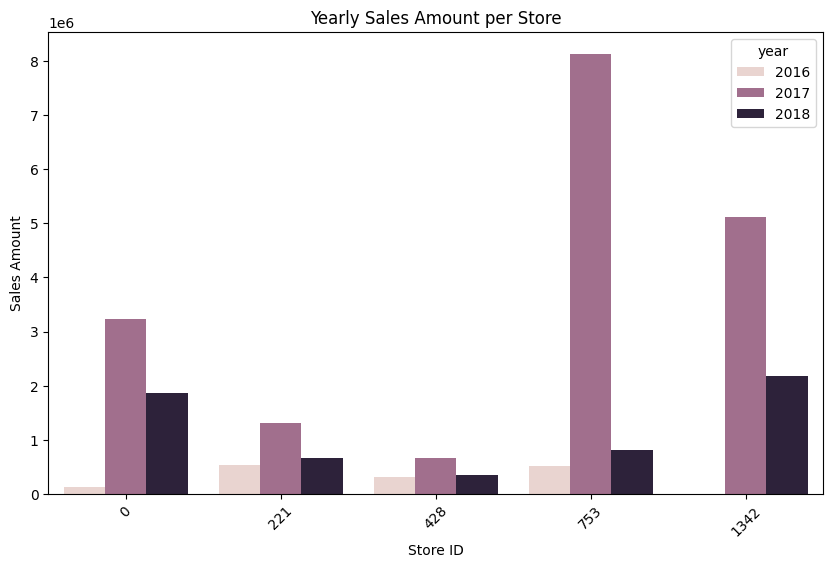

In [77]:
# store_id 별 연도별 매출 변화 시각화
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x="store_id", y="amount", hue="year", data= top5.groupby(['store_id', 'year'])['amount'].sum().reset_index())
plt.title("Yearly Sales Amount per Store")
plt.xlabel("Store ID")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.show()

In [83]:
top5['date'].unique().min()

numpy.datetime64('2016-08-01T00:00:00.000000000')

In [81]:
top5['date'].unique().max()

numpy.datetime64('2018-07-31T00:00:00.000000000')

# 핵심 업종별 주요 고객

In [84]:
top5.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend,year,month,day
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0,2016,12,14
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0,2016,12,14
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0,2016,12,19
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0,2016,12,19
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0,2016,12,19


In [87]:
top5.groupby(['store_id', 'card_id'])['amount'].sum().reset_index().sort_values(by='amount', ascending=False).head(10)

,store_id,card_id,amount
49258,753,134de13cbd,109840
57861,753,cbf306f5f9,44525
11599,0,e9adbe07ca,40410
55575,753,98ee11836a,34628
49912,753,2169e75013,33104
6968,0,8b7724463e,31016
11152,0,e1447c3bc3,30420
412,0,08059e1280,29599
53922,753,75d12b32f9,28955
49306,753,146813a7dd,28393


In [ ]:
# store_id : 753이 특정 card_id : 특정 주요 고객이 많이 결제 하는것을 볼 수가 있다.